Welcome to the Store Sales Analysis and Forecasting Program!

Menu:
1. Upload Dataset
2. Perform EDA (Exploratory Data Analysis)
3. Perform ARIMA Modeling
4. Exit
Please upload your dataset (CSV file):


Saving holidays_events.csv to holidays_events (1).csv
File holidays_events (1).csv uploaded successfully!

Dataset Head:
               type    locale locale_name                    description  \
date                                                                       
2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

            transferred  
date                     
2012-03-02        False  
2012-04-01        False  
2012-04-12        False  
2012-04-14        False  
2012-04-21        False  

Menu:
1. Upload Dataset
2. Perform EDA (Exploratory Data Analysis)
3. Perform ARIMA Modeling
4. Exit

Performing Exploratory Data Analysis...

Missing Values:
type

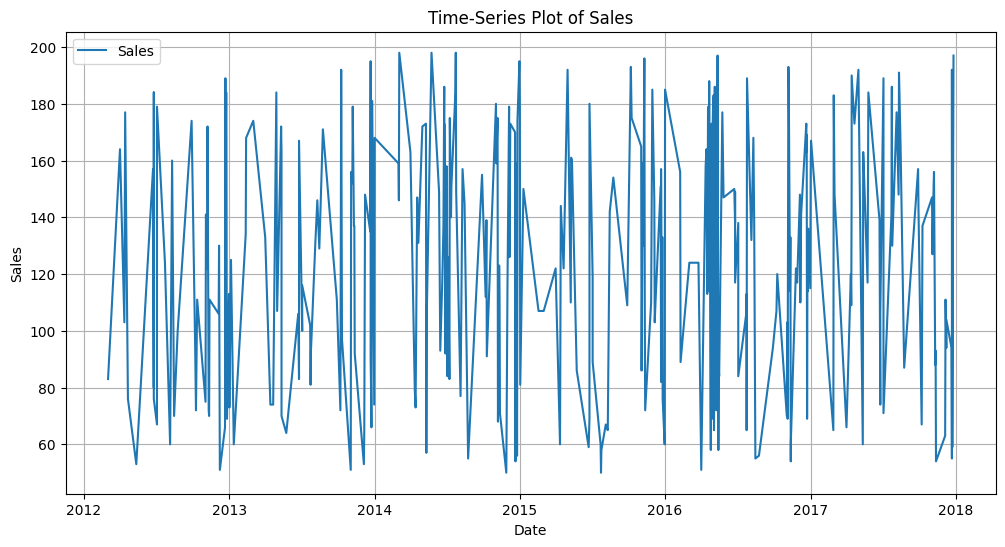

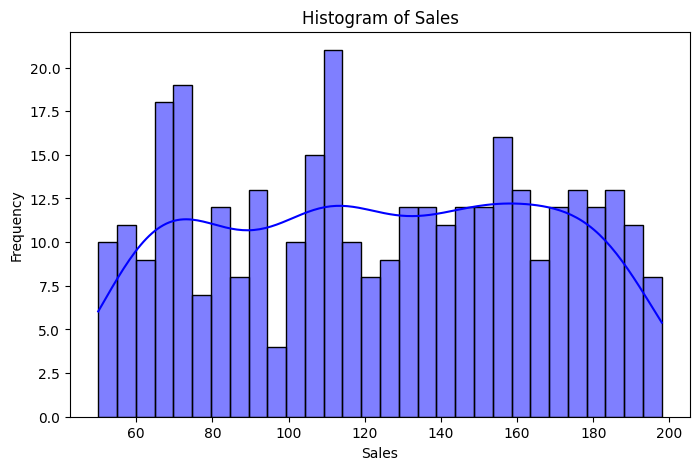

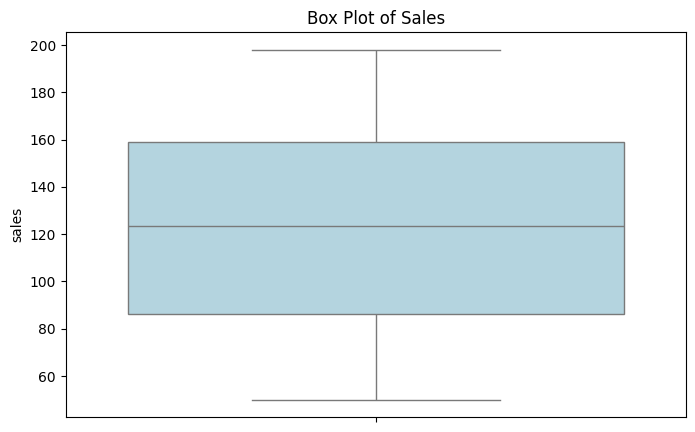


Analyzing trend and seasonality...


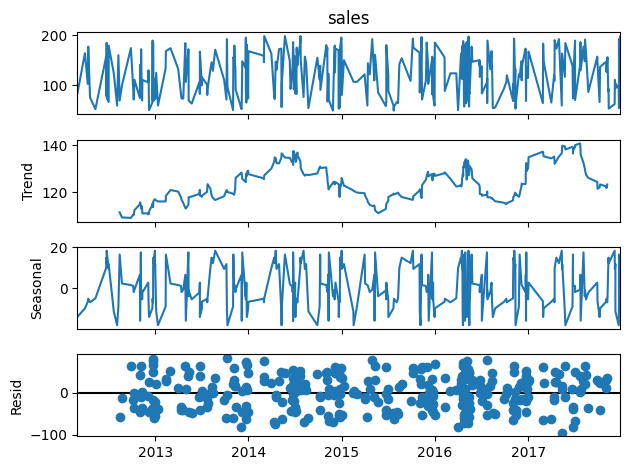


Menu:
1. Upload Dataset
2. Perform EDA (Exploratory Data Analysis)
3. Perform ARIMA Modeling
4. Exit

Performing ARIMA Modeling...

ADF Test:
ADF Statistic: -10.631810617084323
p-value: 5.191196540839029e-19
The data is stationary.


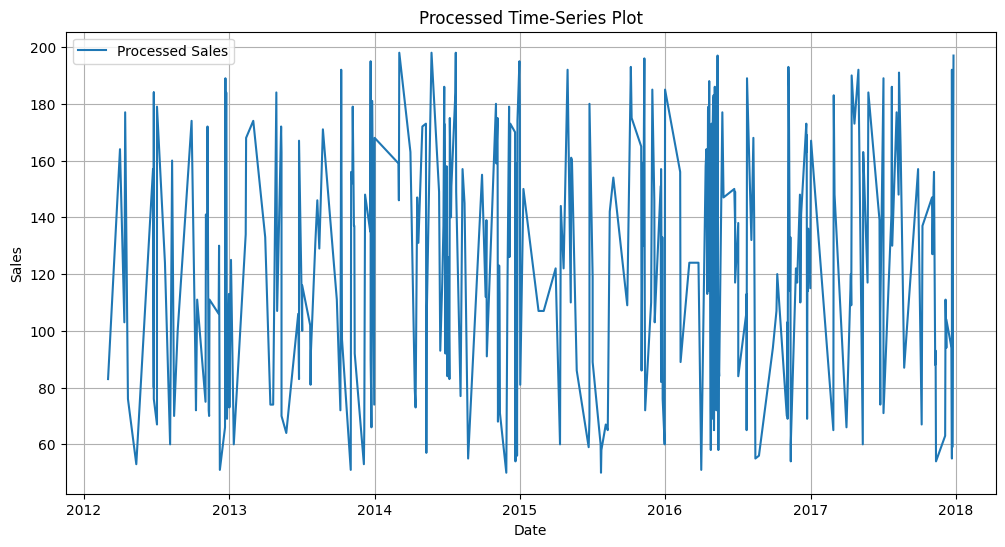


Plotting ACF and PACF...


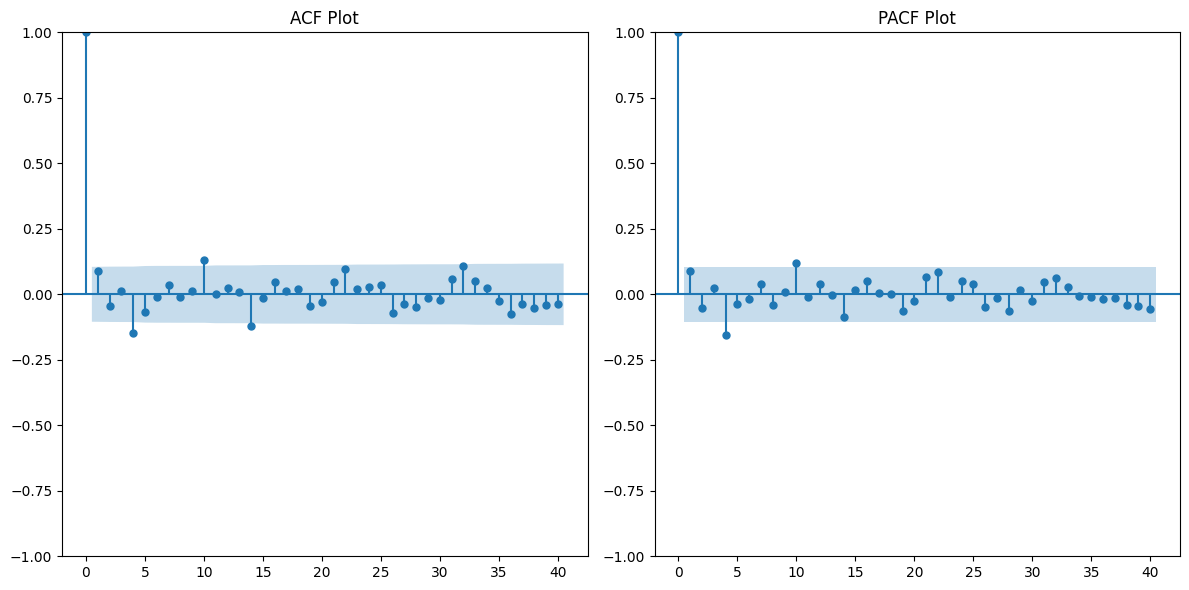


ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  350
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1806.306
Date:                Sat, 25 Jan 2025   AIC                           3618.611
Time:                        15:09:43   BIC                           3630.176
Sample:                             0   HQIC                          3623.215
                                - 350                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0924      0.056      1.663      0.096      -0.017       0.201
ma.L1         -0.9986      0.042    -24.062      0.000      -1.080      -0.917
sigma2      1805.4944    221.9

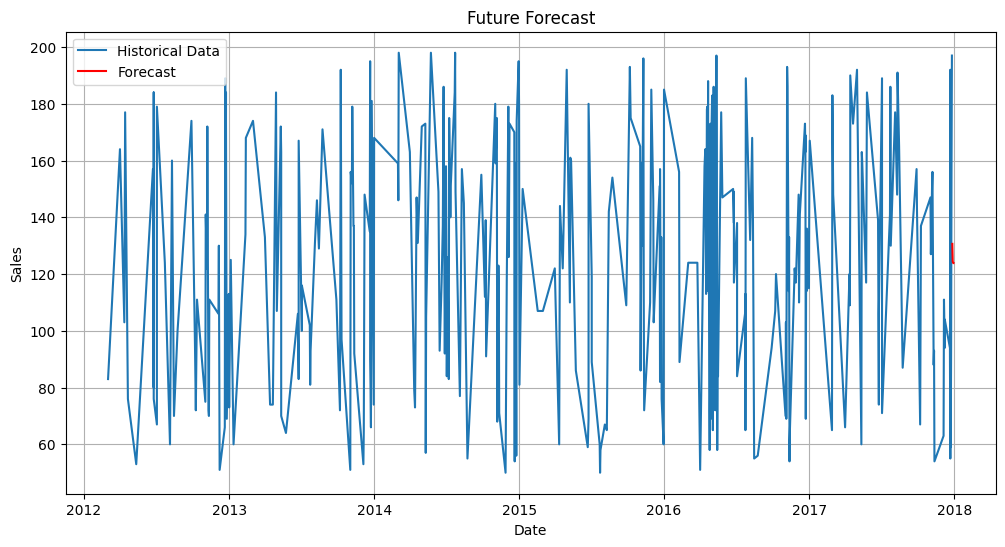


Menu:
1. Upload Dataset
2. Perform EDA (Exploratory Data Analysis)
3. Perform ARIMA Modeling
4. Exit


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from google.colab import files
import warnings
warnings.filterwarnings("ignore")

# Helper functions
def upload_dataset():
    print("Please upload your dataset (CSV file):")
    uploaded = files.upload()  # File upload widget
    for file_name in uploaded.keys():
        print(f"File {file_name} uploaded successfully!")
        df = pd.read_csv(file_name, parse_dates=['date'], index_col='date')
        print("\nDataset Head:")
        print(df.head())
        return df
    return None

def perform_eda(df):
    print("\nPerforming Exploratory Data Analysis...")
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Handle missing values (example: forward fill)
    df = df.fillna(method='ffill')

    print("\nSummary Statistics:")
    print(df.describe(include='all'))

    # If there is no numerical column, simulate one for demonstration
    if 'sales' not in df.columns:
        print("\n'Sales' column not found. Creating a placeholder column...")
        df['sales'] = np.random.randint(50, 200, size=len(df))  # Simulated values

    print("\nVisualizing the data...")

    # Time-Series Plot
    plt.figure(figsize=(12, 6))
    plt.plot(df['sales'], label='Sales')
    plt.title("Time-Series Plot of Sales")
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.legend()
    plt.grid()
    plt.show()

    # Histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(df['sales'], kde=True, bins=30, color='blue')
    plt.title("Histogram of Sales")
    plt.xlabel("Sales")
    plt.ylabel("Frequency")
    plt.show()

    # Box Plot
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df['sales'], color='lightblue')
    plt.title("Box Plot of Sales")
    plt.show()

    # Seasonal Decomposition
    print("\nAnalyzing trend and seasonality...")
    result = seasonal_decompose(df['sales'], model='additive', period=30)
    result.plot()
    plt.show()

    return df

def perform_arima(df):
    print("\nPerforming ARIMA Modeling...")
    y = df['sales']

    # Stationarity Test
    adf_result = adfuller(y)
    print("\nADF Test:")
    print(f"ADF Statistic: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    if adf_result[1] > 0.05:
        print("The data is non-stationary. Applying differencing.")
        y = y.diff().dropna()
    else:
        print("The data is stationary.")

    # Plot Processed Data
    plt.figure(figsize=(12, 6))
    plt.plot(y, label='Processed Sales')
    plt.title("Processed Time-Series Plot")
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.legend()
    plt.grid()
    plt.show()

    # ACF and PACF Plots
    print("\nPlotting ACF and PACF...")
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plot_acf(y, ax=plt.gca(), lags=40)
    plt.title("ACF Plot")
    plt.subplot(122)
    plot_pacf(y, ax=plt.gca(), lags=40)
    plt.title("PACF Plot")
    plt.tight_layout()
    plt.show()

    # ARIMA model
    p, d, q = 1, 1, 1  # Adjust based on ACF/PACF
    model = ARIMA(df['sales'], order=(p, d, q))
    model_fit = model.fit()

    print("\nARIMA Model Summary:")
    print(model_fit.summary())

    # Forecasting
    steps = int(input("\nEnter the number of future steps to forecast: "))
    forecast = model_fit.forecast(steps=steps)

    print("\nForecasted Values:")
    print(forecast)

    # Visualize Forecast
    plt.figure(figsize=(12, 6))
    plt.plot(df['sales'], label="Historical Data")
    plt.plot(pd.date_range(df.index[-1], periods=steps + 1, freq='D')[1:], forecast, label="Forecast", color='red')
    plt.title("Future Forecast")
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.legend()
    plt.grid()
    plt.show()

# Main Menu
def main():
    print("Welcome to the Store Sales Analysis and Forecasting Program!")
    df = None

    while True:
        print("\nMenu:")
        print("1. Upload Dataset")
        print("2. Perform EDA (Exploratory Data Analysis)")
        print("3. Perform ARIMA Modeling")
        print("4. Exit")

        choice = input("Enter your choice (1-4): ")

        if choice == '1':
            df = upload_dataset()
        elif choice == '2':
            if df is not None:
                df = perform_eda(df)
            else:
                print("Please upload a dataset first!")
        elif choice == '3':
            if df is not None:
                perform_arima(df)
            else:
                print("Please upload a dataset first!")
        elif choice == '4':
            print("Exiting the program. Goodbye!")
            break
        else:
            print("Invalid choice. Please try again!")

if __name__ == "__main__":
    main()
